# 워드클라우드 과제
> 
> - 제출자 : 김영목
> - 검색어 : 송해선생님 위키백과 크롤링

In [1]:
# 송해선생님 위키백과 크롤링
# 많이 나오는 단어 그리기
# 전국노래자랑 -> 송해선생님 캐리커쳐로 워크 넣기

In [2]:
# Step1. 송해선생님 위키백과 크롤링

# 선언
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from IPython.display import Image
from urllib.request import urlopen

import pandas as pd
import time
import re

In [3]:
url_page = 'https://ko.wikipedia.org/wiki/%EC%86%A1%ED%95%B4'

In [4]:
# 페이지 BeautifulSoup 객체로 가져온다
html = urlopen(url_page)
soup = BeautifulSoup(html, "lxml")

In [5]:
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ko">
<head>
<meta charset="utf-8"/>
<title>송해 - 위키백과, 우리 모두의 백과사전</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"ko","wgMonthNames":["","1월","2월","3월","4월","5월","6월","7월","8월","9월","10월","11월","12월"],"wgRequestId":"272a09cd-3c86-4a3a-9ac9-424c3ff59185","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"송해","wgTitle":"송해","wgCurRevisionId":32813035,"wgRevisionId":32813035,"wgArticleId":129427,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["위키데이터 속성 P18을 사용하는 문서","최근에 죽은 사람","ISNI 식별자를 포함한 위키백과 문서","VIAF 식별자를 포함한 위키백과 문서","LCCN 식별자를 포함한 위키백과 문서","NLK 식별자를 포함한 위키백과 문서","WorldCat-VIAF 식별자를 포함한 위키백과 문서",
"1927년 출생","2022년 사망","20세기 대한민국 사람","21세기 대한민국 사람","대한민국의 텔레비전 진행자

In [6]:
reple = soup.find('div','mw-parser-output') #tbody는 하나니까 find로 찾아줘야 find_all로 했을시 뒤의 오류가 없다.
# reple = reple.find('div','ifr_area basic_ifr')
# reple = reple.find('div','score_result')
reple = reple.find_all('p')
len(reple) # 1~11 까지
reple11 = reple[11].get_text()
reple11
# reple1 = reple[1].get_text()
# reple2 = reple[2].get_text()
# reple1              

"2022년 6월 8일 서울특별시 강남구 도곡동 자택에서 사망했다. 6월 10일, 서울 종로구 서울대병원 장례식장에서 거행된 영결식에서 이용식은 추도사를 통해 '이곳에선 전국노래자랑을 많은 사람과 힘차게 외쳤지만 이제는 수많은 별들 앞에서(천국에서) 천국노래자랑을 외쳐달라', '우리나라는 동해, 서해, 남해, 그리고 송해가 있습니다'라는 말로 작별 인사를 전했다. 고인의 영구는 후배 희극 배우 최양락, 양상국, 조문식, 강호동, 조세호, 유재석이 운구를 맡았다.\n"

In [7]:
# for 문으로 합치자

Song = []

for x in range(1,len(reple)-1):
    song = reple[x].get_text()
    
    Song.append(song)
    

In [8]:
Song_text = str(Song)
Song_text

'[\'송해(宋海[2], 본명:\\xa0송복희,\\xa0본명 한자:\\xa0宋福熙[2], 1927년 4월 27일~2022년 6월 8일)는 대한민국의 가수이자 방송인이다.[3] 음악 경연 TV 프로그램 《전국노래자랑》 진행자를 34년간 맡았다.\\n\', \'대한민국의 최고령 가수, 연예인으로 1955년 창공 악극단으로 데뷔한 이래 2022년 95세로 고인이 될 때까지 현역으로 활동하였다.[4][5] 2022년 6월 8일 오전 8시 30분경 서울 도곡동 같은 아파트 위층에 사는 딸에 의해 자택 화장실에서 쓰러진 채 발견되었고, 긴급 출동한 소방대원에 의해 현장에서 사망이 확인된 이후 병원으로 이송되었다. 오전 8시 45분, 병원에서 사망이 공식 확인되었다. 송해는 올해 들어 1월과 지난달 건강 이상으로 병원에 입원했으며, 지난 3월에는 코로나-19에 확진되기도 했다. 6월 10일 서울대병원에서 영결식을 마치고 종로구 낙원동 송해길, KBS를 거쳐 경북 김천시 소재의 화장장에서 화장된 후, 고인의 유해는 대구광역시 달성군 옥포읍 기세리 546(송해공원 인근)에 안장되었다.\\n\', "최근에는 건강상 이유로 \'전국노래자랑\' 하차를 고민하기도 했고, 제작진과 스튜디오 녹화로 방송에 계속 참여하는 방안 등을 논의해왔으나 이후 야외 녹화로 프로그램 제작 일정이 정해지면서 임시 하차 후에 다시 진행하는 방향으로 변경되었다. 하지만 야외 녹화를 시작한지 얼마되지 않아 단독 MC였던 송해의 갑작스러운 별세로, 진행자가 정해질 때까지는 당분간 작곡가 이호섭과 KBS아나운서 임수민의 더블 MC 체제로 프로그램이 편성된다.\\n", \'1927년 황해도 재령군 재령면에서 출생했으며, 본관은 여산이다. 1949년 해주예술전문학교 성악과에 입학해 공연을 시작으로 노래를 시작했다. 1950년 6월 한국 전쟁이 발발했고, 이듬 해 1.4 후퇴 당시 미군의 탈출선을 타고 월남했다. 송해는 당시 인민군의 징집을 피해 몇 차례씩 동네 산자락으로 올라가 피신으로 돌아가는 생활을 반복했는데,

In [9]:
Song_txt = Song_text.replace('\\n', ' ') #공간을 의워나야 구분된다.
Song_txt = Song_txt.replace('\n', ' ') #공간을 의워나야 구분된다.
Song_txt = Song_txt.replace('\\xa0', ' ')
Song_txt = Song_txt.replace('[2]', ' ')
Song_txt = Song_txt.replace('[6]', ' ')
Song_txt = Song_txt.replace('[9]', ' ')
Song_txt = Song_txt.replace('\'', ' ')
Song_txt = Song_txt.replace('  ', ' ')
Song_txt = Song_txt.replace('[', ' ')

Song_txt

'  송해(宋海 , 본명: 송복희, 본명 한자: 宋福熙 , 1927년 4월 27일~2022년 6월 8일)는 대한민국의 가수이자 방송인이다. 3] 음악 경연 TV 프로그램 《전국노래자랑》 진행자를 34년간 맡았다. , 대한민국의 최고령 가수, 연예인으로 1955년 창공 악극단으로 데뷔한 이래 2022년 95세로 고인이 될 때까지 현역으로 활동하였다. 4] 5] 2022년 6월 8일 오전 8시 30분경 서울 도곡동 같은 아파트 위층에 사는 딸에 의해 자택 화장실에서 쓰러진 채 발견되었고, 긴급 출동한 소방대원에 의해 현장에서 사망이 확인된 이후 병원으로 이송되었다. 오전 8시 45분, 병원에서 사망이 공식 확인되었다. 송해는 올해 들어 1월과 지난달 건강 이상으로 병원에 입원했으며, 지난 3월에는 코로나-19에 확진되기도 했다. 6월 10일 서울대병원에서 영결식을 마치고 종로구 낙원동 송해길, KBS를 거쳐 경북 김천시 소재의 화장장에서 화장된 후, 고인의 유해는 대구광역시 달성군 옥포읍 기세리 546(송해공원 인근)에 안장되었다. , "최근에는 건강상 이유로 전국노래자랑 하차를 고민하기도 했고, 제작진과 스튜디오 녹화로 방송에 계속 참여하는 방안 등을 논의해왔으나 이후 야외 녹화로 프로그램 제작 일정이 정해지면서 임시 하차 후에 다시 진행하는 방향으로 변경되었다. 하지만 야외 녹화를 시작한지 얼마되지 않아 단독 MC였던 송해의 갑작스러운 별세로, 진행자가 정해질 때까지는 당분간 작곡가 이호섭과 KBS아나운서 임수민의 더블 MC 체제로 프로그램이 편성된다. ", 1927년 황해도 재령군 재령면에서 출생했으며, 본관은 여산이다. 1949년 해주예술전문학교 성악과에 입학해 공연을 시작으로 노래를 시작했다. 1950년 6월 한국 전쟁이 발발했고, 이듬 해 1.4 후퇴 당시 미군의 탈출선을 타고 월남했다. 송해는 당시 인민군의 징집을 피해 몇 차례씩 동네 산자락으로 올라가 피신으로 돌아가는 생활을 반복했는데, 3번째로 피신했을 때 상황이 악화되어 집으로 돌아가지 못하고 

In [10]:
# 뽑기전에 대략적인 명사 추출
import nltk
from konlpy.tag import Kkma,Okt

In [11]:
okt = Okt()

In [12]:
# 트위터 형태소 분석 후 명사만 추출
song_txt_nouns = okt.nouns(Song_txt)
len(song_txt_nouns)

530

In [13]:
one_words = []
tow_words = []
etc_words = []

for noun in song_txt_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(83, 357, 90)

In [14]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(48, 215, 60)

In [15]:
#한글자 확인하기
for word in one_words:
    print(word, end='\t')

이	안	더	깨	진	향	편	길	통	를	수	관	과	봄	음	집	의	조	보	확	후	읍	것	그	때	곡	번	총	북	바	선	산	면	등	뜻	채	적	얘	세	뒤	딸	몇	해	말	못	령	로	제	

In [16]:
stop_words = []

stop_words.extend(one_words) #리스트를 넣을때 extend
stop_words.append('송해') #이름 제외
# stop_words
len(stop_words)

49

In [17]:
# stop_words 빼기
song_txt_nouns = [ word for word in song_txt_nouns if word not in stop_words ]
len(song_txt_nouns)

425

In [18]:
song_text  = nltk.Text(song_txt_nouns, name='송해') 
#자연어 text
type(song_text), len(song_text)

(nltk.text.Text, 425)

In [19]:
# 상위 30개 수 
song_text.vocab().most_common(425) # 단어별로 카운트 vocab, most_common 제일 많은수 반환

[('진행', 13),
 ('방송', 8),
 ('전국노래자랑', 7),
 ('녹화', 7),
 ('프로그램', 6),
 ('활동', 6),
 ('이후', 6),
 ('당시', 6),
 ('하차', 5),
 ('월남', 5),
 ('대한민국', 4),
 ('진행자', 4),
 ('사망', 4),
 ('병원', 4),
 ('야외', 4),
 ('출연', 4),
 ('가수', 3),
 ('데뷔', 3),
 ('건강', 3),
 ('이상', 3),
 ('기도', 3),
 ('다시', 3),
 ('시작', 3),
 ('아나운서', 3),
 ('재령', 3),
 ('노래', 3),
 ('탈출', 3),
 ('타고', 3),
 ('차례', 3),
 ('모친', 3),
 ('가로수', 3),
 ('누비', 3),
 ('자신', 3),
 ('잠시', 3),
 ('중단', 3),
 ('본명', 2),
 ('음악', 2),
 ('경연', 2),
 ('최고', 2),
 ('창공', 2),
 ('악극단', 2),
 ('고인', 2),
 ('오전', 2),
 ('확인', 2),
 ('코로나', 2),
 ('화장', 2),
 ('이유', 2),
 ('제작', 2),
 ('스튜디오', 2),
 ('별세', 2),
 ('한국', 2),
 ('피신', 2),
 ('악화', 2),
 ('마지막', 2),
 ('이야기', 2),
 ('과정', 2),
 ('바다', 2),
 ('영화', 2),
 ('코미디', 2),
 ('라디오', 2),
 ('교통', 2),
 ('한남대교', 2),
 ('운전', 2),
 ('충격', 2),
 ('역시', 2),
 ('자리', 2),
 ('개편', 2),
 ('개월', 2),
 ('공개방송', 2),
 ('평양', 2),
 ('고향', 2),
 ('송복희', 1),
 ('한자', 1),
 ('이자', 1),
 ('방송인', 1),
 ('연예인', 1),
 ('세로', 1),
 ('현역', 1),
 ('서울', 1),
 ('도곡동', 1),
 ('아파트', 1)

In [20]:
# nltk패키지를 통해 konlpy에서 뽑은 명사들 상위 500개 추출
data = song_text.vocab().most_common(425)
len(data)

274

In [21]:
data

[('진행', 13),
 ('방송', 8),
 ('전국노래자랑', 7),
 ('녹화', 7),
 ('프로그램', 6),
 ('활동', 6),
 ('이후', 6),
 ('당시', 6),
 ('하차', 5),
 ('월남', 5),
 ('대한민국', 4),
 ('진행자', 4),
 ('사망', 4),
 ('병원', 4),
 ('야외', 4),
 ('출연', 4),
 ('가수', 3),
 ('데뷔', 3),
 ('건강', 3),
 ('이상', 3),
 ('기도', 3),
 ('다시', 3),
 ('시작', 3),
 ('아나운서', 3),
 ('재령', 3),
 ('노래', 3),
 ('탈출', 3),
 ('타고', 3),
 ('차례', 3),
 ('모친', 3),
 ('가로수', 3),
 ('누비', 3),
 ('자신', 3),
 ('잠시', 3),
 ('중단', 3),
 ('본명', 2),
 ('음악', 2),
 ('경연', 2),
 ('최고', 2),
 ('창공', 2),
 ('악극단', 2),
 ('고인', 2),
 ('오전', 2),
 ('확인', 2),
 ('코로나', 2),
 ('화장', 2),
 ('이유', 2),
 ('제작', 2),
 ('스튜디오', 2),
 ('별세', 2),
 ('한국', 2),
 ('피신', 2),
 ('악화', 2),
 ('마지막', 2),
 ('이야기', 2),
 ('과정', 2),
 ('바다', 2),
 ('영화', 2),
 ('코미디', 2),
 ('라디오', 2),
 ('교통', 2),
 ('한남대교', 2),
 ('운전', 2),
 ('충격', 2),
 ('역시', 2),
 ('자리', 2),
 ('개편', 2),
 ('개월', 2),
 ('공개방송', 2),
 ('평양', 2),
 ('고향', 2),
 ('송복희', 1),
 ('한자', 1),
 ('이자', 1),
 ('방송인', 1),
 ('연예인', 1),
 ('세로', 1),
 ('현역', 1),
 ('서울', 1),
 ('도곡동', 1),
 ('아파트', 1)

In [22]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

274

In [23]:
# 이미지에 넣기
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

In [24]:
# 이미지파일 numpy로 읽기
shape_img = np.array(Image.open('images/song4.png'))
cloud_img = ImageColorGenerator(shape_img)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

(-0.5, 682.5, 549.5, -0.5)

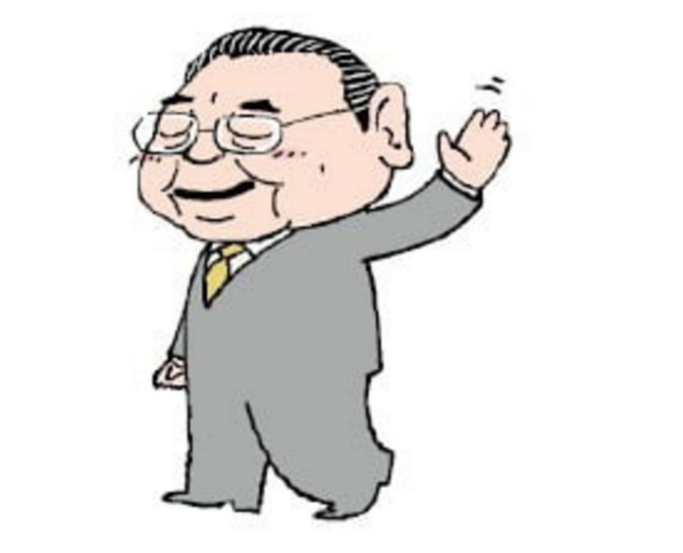

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(shape_img)
plt.axis('off')

In [27]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.2,
                     mask = shape_img, 
                     background_color = 'white',                 
                     min_font_size=1, max_font_size=100).generate_from_frequencies(dict_data)

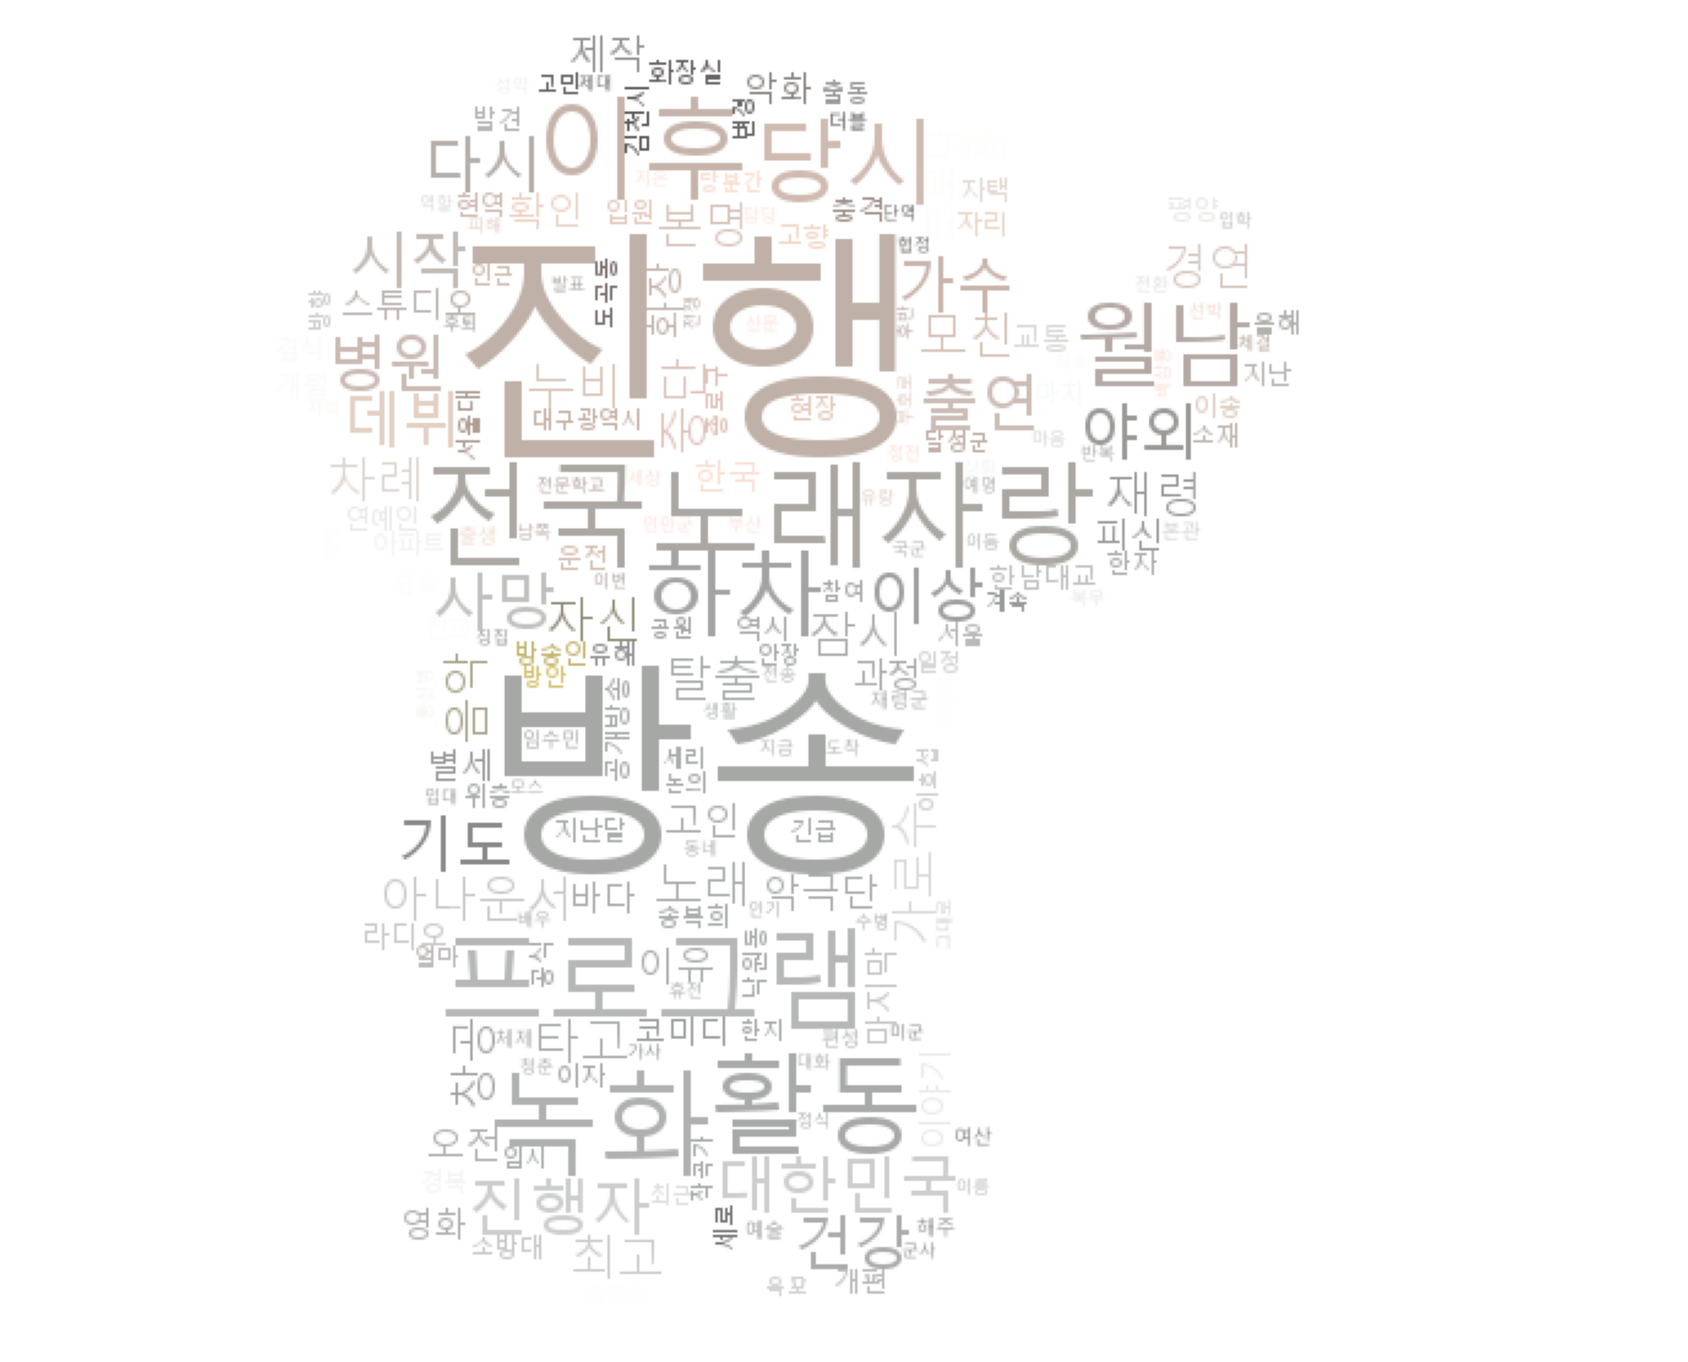

In [28]:
save_img = 'wordcloud/wc_song.png'
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud.recolor(color_func=cloud_img))
plt.axis('off')
plt.savefig(save_img)

In [29]:
shape_img = np.array(Image.open('images/song4.png'))
shape_img

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

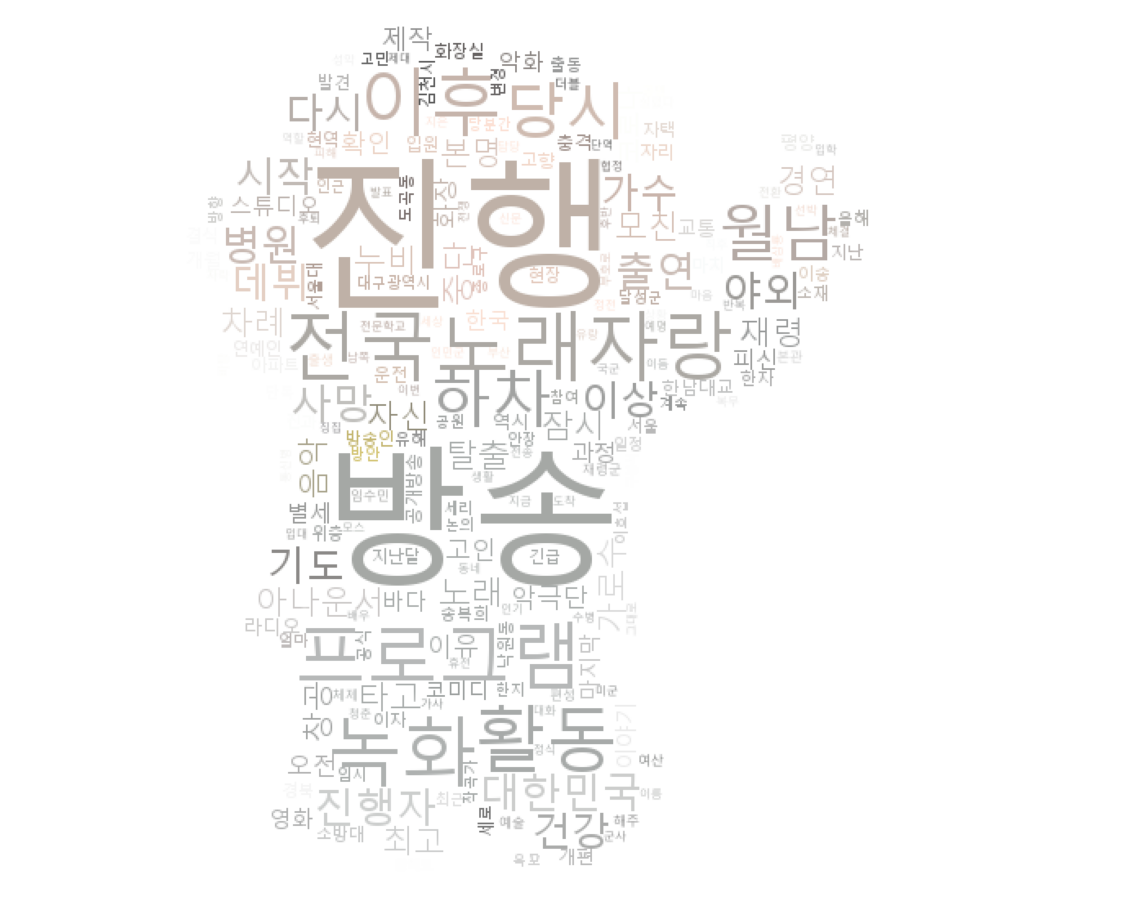

In [30]:
shape_img = np.array(Image.open('images/song4.png'))
cloud_img = ImageColorGenerator(shape_img)

params = {
    "width"            : 300,
    "height"           : 400, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    "background_color" : 'white',
    "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "mask"             :  shape_img, 
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/song4.png'
plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=cloud_img))
plt.axis('off')
plt.savefig(save_img)